# Laporan Bayesian Networks

Nama  : Alif As'ad Ramadhan

NRP   : 5054231007

In [24]:
# Import wanring untuk mengabaikan Warning
import warnings
warnings.filterwarnings("ignore")

In [25]:
from probability import *
from utils import print_table
from notebook import psource, pseudocode, heatmap

## Bayesian Networks

### Bayesian Networks adalah Representasi Distribusi Probabilitas Bersama yang Mengkodekan Koleksi Pernyataan Independen Kondisional

Bayesian Networks merupakan representasi dari distribusi probabilitas bersama yang mengkodekan sejumlah pernyataan independensi kondisional. Dalam implementasinya, Bayesian Networks diwujudkan melalui kelas bernama `BayesNet`, yang terdiri dari kumpulan node yang diimplementasikan melalui kelas `BayesNode`. Implementasi dalam kedua kelas tersebut fokus pada variabel boolean. Setiap node dikaitkan dengan suatu variabel dan memiliki tabel probabilitas kondisional (CPT).

CPT mewakili distribusi probabilitas dari variabel yang dikondisikan berdasarkan induknya 
**P(X∣parents)**. Hal ini berarti bahwa nilai probabilitas dari variabel tergantung pada nilai dari variabel-variabel induknya. Dalam konteks ini, CPT memainkan peran penting dalam menentukan nilai probabilitas variabel pada node berdasarkan keadaan dari node-node induknya.

Berikut ini adalah penjelasan mengenai implementasi BayesNode.

In [27]:
psource(BayesNode)

### Implementasi Bayesian Networks Menggunakan BayesNode

Dalam Bayesian Networks, setiap node merepresentasikan sebuah variabel yang dapat memiliki hubungan ketergantungan dengan variabel lainnya. Di sini, kita menggunakan kelas `BayesNode` untuk membangun struktur jaringan yang menggambarkan ketergantungan antar variabel dan tabel probabilitas kondisionalnya. Konstruktor `BayesNode` menerima tiga parameter utama: variable, parents, dan cpt.

- variable: Nama variabel yang diwakili oleh node tersebut, contohnya seperti Earthquake, Alarm, atau JohnCalls.

- parents: Daftar atau string variabel-variabel induk yang memengaruhi probabilitas variabel saat ini.

- cpt (Conditional Probability Table): Tabel probabilitas kondisional yang menunjukkan probabilitas P(X=true | parents=values). cpt direpresentasikan

- sebagai dictionary di mana kunci adalah kombinasi nilai boolean dari induk, dan nilai adalah probabilitas X=true untuk kombinasi nilai tersebut.

Dalam setiap kasus, probabilitas X=false tidak dicantumkan secara eksplisit karena nilainya dapat diperoleh dari P(X=false) = 1 - P(X=true).

### Implementasi Bayesian Networks

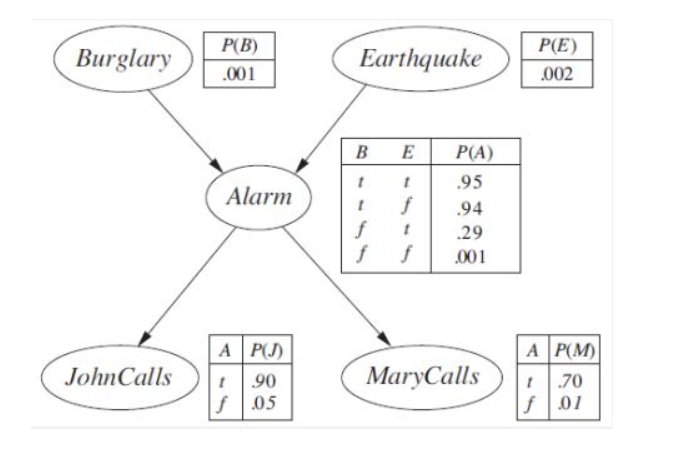

Gambar yang diberikan menunjukkan struktur Bayesian Networks yang memodelkan hubungan antara kejadian-kejadian berikut:

1. `Burglary` (P(B) = 0.001)

2. `Earthquake` (P(E) = 0.002)

3. `Alarm` yang bergantung pada Burglary dan Earthquake

4. `JohnCalls` yang bergantung pada Alarm

5. `MaryCalls` yang juga bergantung pada Alarm

Hubungan ini divisualisasikan sebagai graf berarah, di mana busur menunjukkan pengaruh satu variabel terhadap variabel lainnya. Di samping graf, tabel probabilitas kondisional (CPT) juga disediakan:

- `Alarm` bergantung pada kombinasi nilai Burglary dan Earthquake. Tabel menunjukkan probabilitas **P(Alarm=true | B, E)**.

- `JohnCalls` dan MaryCalls masing-masing bergantung pada Alarm, dengan probabilitas panggilan untuk **Alarm=true** dan **Alarm=false**.

In [33]:
alarm_node = BayesNode('Alarm', ['Burglary', 'Earthquake'],
 {(True, True): 0.95,(True, False): 0.94,
(False, True): 0.29, (False, False): 0.001})

Dimungkinkan untuk menghindari penggunaan tuple ketika hanya ada satu induk. Jadi format alternatif untuk cpt adalah

In [36]:
john_node = BayesNode('JohnMemanggil', ['Alarm'], {True: 0.90, False: 0.05})
mary_node = BayesNode('MaryMemanggil', 'Alarm', {(True, ): 0.70, (False, ): 0.01}) # Menggunakan string untuk induk.
# Setara dengan definisi john_node.

Pada kasus tertentu, node dalam Bayesian Network tidak memiliki induk (parent) sehingga hanya memiliki probabilitas unconditional atau probabilitas dasar saja. Dalam contoh ini, kita mendefinisikan dua node tanpa induk sebagai berikut:

In [39]:
burglary_node = BayesNode('Burglary', '', 0.001)
earthquake_node = BayesNode('Earthquake', '', 0.002)

Node `burglary_node` dan `earthquake_node` masing-masing menunjukkan probabilitas dasar terjadinya kejadian `Burglary (pencurian)` dan `Earthquake (gempa bumi)`. Karena tidak memiliki induk, nilai probabilitas diberikan langsung tanpa ketergantungan pada variabel lain.

Setelah mendefinisikan node-node di dalam jaringan, kita dapat menggunakan metode `p`untuk melakukan pencarian nilai probabilitas kondisional. Metode `p` pada BayesNode menerima dua argumen:

- `value`: nilai boolean (True atau False) dari variabel target.

- `event`: dictionary yang mencatat nilai dari setiap variabel terkait dalam jaringan.

Misalnya, untuk menghitung probabilitas `P(JohnCalls=False | Alarm=True, Burglary=True)`, kita dapat menggunakan kode berikut:

In [43]:
john_node.p(False, {'Alarm': True, 'Burglary': True})  # P(JohnCalls=False | Alarm=True)

0.09999999999999998

Output dari perintah di atas adalah `0.09999999999999998`, yang menunjukkan probabilitas JohnCalls bernilai `False` ketika `Alarm=True` dan `Burglary=True`.

### Membangun Bayesian Network dengan `BayesNet`

Setelah semua informasi tentang node tersedia, kita dapat membangun `Bayesian Network` menggunakan kelas `BayesNet`. Berbeda dengan `BayesNode`, kelas `BayesNet` tidak mengambil node individual sebagai input, melainkan menerima daftar spesifikasi node `(node_specs)`, yaitu tuple yang berisi parameter yang diperlukan untuk membuat `BayesNode` (yaitu, `X`, `parents`, dan `cpt`). Urutan dalam `node_specs` harus menyusun node induk sebelum node anak untuk memastikan bahwa setiap node memiliki informasi yang benar tentang induknya.

In [47]:
psource(BayesNet)

Konstruktor dari BayesNet menerima setiap item dalam node_specs dan menambahkan sebuah BayesNode ke dalam variabel objek nodes dengan memanggil metode add. Metode add ini, pada gilirannya, menambahkan node ke dalam jaringan (net). Induk (parents) dari node tersebut harus sudah ada di dalam jaringan, dan variabelnya sendiri tidak boleh ada. Oleh karena itu, metode add memungkinkan kita untuk mengembangkan sebuah BayesNet dengan syarat bahwa induknya sudah ada.

burglary global adalah sebuah instance dari BayesNet yang sesuai dengan contoh berikut:

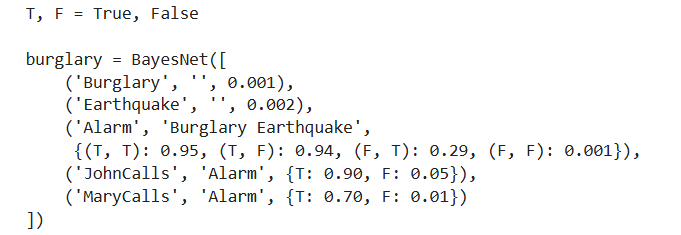

In [57]:
burglary

BayesNet([('Burglary', ''), ('Earthquake', ''), ('Alarm', 'Burglary Earthquake'), ('JohnCalls', 'Alarm'), ('MaryCalls', 'Alarm')])

Metode variable_node pada BayesNet memungkinkan kita untuk mengakses instance
BayesNode yang ada di dalam sebuah BayesNet. Dengan metode ini, kita dapat memodifikasi
cpt (Conditional Probability Table) dari node-node yang ada secara langsung. Jadi,
variable_node memberikan akses langsung ke node tertentu dalam jaringan dan
memungkinkan perubahan terhadap nilai-nilai di dalam tabel probabilitas kondisionalnya.

In [62]:
type(burglary.variable_node('Alarm'))

probability.BayesNode

In [64]:
burglary.variable_node('Alarm').cpt

{(True, True): 0.95,
 (True, False): 0.94,
 (False, True): 0.29,
 (False, False): 0.001}

Rinciannya:

- `(True, True): 0.95` - Jika ada pencurian dan gempa, probabilitas Alarm berbunyi adalah `0,95`.

- `(True, False): 0.94` - Jika ada pencurian tetapi tidak ada gempa, probabilitas Alarm berbunyi adalah `0,94`.

- `(False, True): 0.29` - Jika tidak ada pencurian tetapi ada gempa, probabilitas Alarm berbunyi adalah `0,29`.

- `(False, False): 0.001` - Jika tidak ada pencurian dan tidak ada gempa, probabilitas Alarm berbunyi adalah `0,001`.

`CPT` ini digunakan untuk memperkirakan apakah alarm akan berbunyi berdasarkan kombinasi keadaan `Burglary` dan `Earthquake`.

## Exact Inference in Bayesian Networks

Jaringan Bayes merupakan representasi yang lebih ringkas dari distribusi gabungan penuh, dan
seperti halnya distribusi gabungan penuh, jaringan ini memungkinkan kita untuk melakukan
inferensi, yaitu menjawab pertanyaan tentang distribusi probabilitas variabel acak berdasarkan
bukti yang diberikan.

Namun, algoritma eksak tidak skalabel dengan baik untuk jaringan yang lebih besar. Oleh karena
itu, algoritma pendekatan (approximate) dijelaskan pada bagian berikutnya.

### Inference by Enumeration

Teknik yang digunakan dalam `enumerate_joint_ask` dan `enumerate_joint juga`
diterapkan untuk melakukan inferensi dari Jaringan Bayes. Metode enumeration_ask dan
enumerate_all mengimplementasikan algoritma yang dijelaskan dalam Gambar 14.9 pada
buku tersebut. Algoritma ini digunakan untuk melakukan enumerasi pada variabel-variabel
dalam jaringan, memungkinkan kita untuk menghitung probabilitas dengan cara yang lebih
sistematis dan terstruktur, meskipun memerlukan waktu komputasi yang lebih besar pada
jaringan yang lebih kompleks

In [73]:
psource(enumerate_all)

`enumerate_all` secara rekursif mengevaluasi bentuk umum dari Persamaan 14.4 dalam buku
tersebut.

dengan ketentuan bahwa `(X, e , y)` ditulis dalam bentuk produk dari probabilitas bersyarat
`P(variable∣parents(variable))`dari Jaringan Bayesian.

`enumeration_ask` memanggil `enumerate_all` pada setiap nilai dari variabel yang ditanyakan `𝑋`
dan akhirnya melakukan normalisasi hasilnya.

In [82]:
psource(enumeration_ask)

Untuk mencari

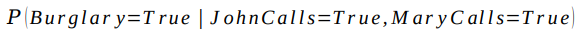

menggunakan fungsi enumeration_ask, kita akan melalui langkah-langkah `inferensi Bayesian`
pada jaringan `burglary`. Fungsi `enumeration_ask` menerima tiga argumen yaitu `X` = nama
variabel, `e` = evidence (dalam bentuk dictionary seperti yang dijelaskan sebelumnya), dan `bn` =
Jaringan Bayesian (Bayes Net) yang digunakan untuk inferensi.

In [89]:
ans_dist = enumeration_ask('Burglary', {'JohnCalls': True,
'MaryCalls': True}, burglary)
ans_dist[True]

0.2841718353643929

### Variable Elimination

Algoritma enumerasi dapat diperbaiki secara substansial dengan menghilangkan perhitungan yang berulang. Dalam enumerasi, kita menggabungkan distribusi bersama dari semua variabel tersembunyi. Ini memiliki ukuran eksponensial seiring bertambahnya jumlah variabel tersembunyi. Penghilangan variabel `(Variable Elimination)` menggunakan penggabungan dan `marginalisasi` yang dilakukan secara berselang-seling.

Sebelum kita mempelajari implementasi dari Penghilangan Variabel, kita harus terlebih dahulu memahami tentang Faktor.

Secara umum, kita menyebut array multidimensional dari tipe `P(Y1 ... Yn | X1 ... Xm)` sebagai faktor, di mana beberapa `Xs` dan `Ys` mungkin diberikan nilai. Faktor diimplementasikan dalam modul probabilitas sebagai kelas Faktor. Faktor ini menerima variabel dan cpt sebagai input.

Fungsi Pembantu
Terdapat beberapa fungsi pembantu yang membantu dalam pembuatan cpt untuk Faktor berdasarkan bukti yang ada. Mari kita jelajahi satu per satu.

In [92]:
psource(make_factor)

`make_factor` digunakan untuk membuat `cpt` dan variabel-variabel yang akan diteruskan ke konstruktor dari kelas Faktor. Kita menggunakan `make_factor` untuk setiap variabel. Fungsi ini menerima argumen `var` yaitu variabel tertentu, `e` yaitu bukti yang ingin kita lakukan inferensi, dan `bn` yaitu jaringan Bayes.

Di sini, variabel untuk setiap node merujuk pada daftar yang terdiri dari variabel itu sendiri dan orangtua-ortuanya, kecuali variabel-variabel yang merupakan bagian dari bukti. Daftar ini dibuat dengan cara mencari node.parents dan memfilter yang bukan merupakan bagian dari bukti.

`CPT` yang dibuat adalah yang serupa dengan `CPT` asli dari node, tetapi hanya mencakup baris-baris yang sesuai dengan bukti yang ada.

In [95]:
psource(all_events)

Fungsi `all_events` adalah fungsi generator rekursif yang menghasilkan kunci untuk `CPT` asli yang merupakan bagian dari node. Fungsi ini bekerja dengan cara memperluas bukti yang terkait dengan node, sehingga semua output dari `all_events` hanya mencakup peristiwa-peristiwa yang mendukung bukti tersebut. Karena `all_events` adalah fungsi generator, satu peristiwa akan dikembalikan setiap kali fungsi ini dipanggil.

In [98]:
f5 = make_factor('MaryCalls', {'JohnCalls': True, 'MaryCalls': True}, burglary)

In [100]:
f5

In [102]:
f5.cpt

{(True,): 0.7, (False,): 0.01}

In [104]:
f5.variables

['Alarm']

Di sini, kunci `f5.cpt False` memberikan probabilitas untuk `P(MaryCalls=True | Alarm=False)`. Karena representasi kita hanya menyimpan probabilitas untuk kasus di mana variabel node bernilai True, ini sama dengan CPT dari BayesNode. Sekarang, mari kita coba contoh yang sedikit berbeda dari buku, di mana buktinya adalah Alarm = True.

In [107]:
new_factor = make_factor('MaryCalls', {'Alarm': True}, burglary)

In [109]:
new_factor.cpt

{(True,): 0.7, (False,): 0.30000000000000004}

Di sini cpt adalah untuk `P(MaryCalls | Alarm = True)`. Oleh karena itu probabilitas untuk `True` dan `False` berjumlah satu. Perhatikan perbedaan antara kedua kasus tersebut. Sekali lagi, satu-satunya baris yang disertakan adalah yang konsisten dengan bukti.

## Operations on Factors



In [113]:
psource(Factor.pointwise_product)

`Factor.pointwise_product` mengimplementasikan metode untuk membuat distribusi bersama dengan menggabungkan dua faktor. Kita mengambil gabungan variabel dari kedua faktor tersebut, kemudian menghasilkan CPT untuk faktor baru menggunakan fungsi all_events. Perhatikan bahwa kita telah menghilangkan baris yang tidak konsisten dengan bukti. Produk titik (pointwise product) menetapkan probabilitas baru dengan mengalikan baris-baris yang mirip dengan cara kerja pada operasi join dalam basis data.

In [116]:
psource(pointwise_product)

`pointwise_product` memperluas operasi ini ke lebih dari dua operand, di mana operasi ini dilakukan secara berurutan dalam pasangan dua-dua.

In [119]:
psource(Factor.sum_out)

`Factor.sum_out` membuat faktor dengan menghilangkan suatu variabel dengan cara menjumlahkan atas nilainya. Sekali lagi, `events_all` digunakan untuk menghasilkan kombinasi bagi variabel-variabel lainnya.

In [122]:
psource(sum_out)

`sum_out` menggunakan baik `Factor.sum_out` maupun `pointwise_product` untuk akhirnya menghilangkan variabel tertentu dari semua faktor dengan cara menjumlahkan atas nilainya.

## Elimination Ask

Algoritma yang dijelaskan dalam Gambar 14.11 dari buku diimplementasikan oleh fungsi `elimination_ask`. Fungsi ini digunakan untuk inferensi. Ide utama dari algoritma ini adalah menghilangkan variabel tersembunyi dengan cara menyelang-seling penggabungan dan marginalisasi. Fungsi ini menerima 3 argumen: `X (variabel kueri)`, `e (variabel bukti)`, dan `bn (jaringan Bayes)`.

Algoritma ini membuat faktor-faktor dari Bayes Nodes dalam urutan terbalik dan menghilangkan variabel tersembunyi menggunakan sum_out. Akhirnya, algoritma ini mengambil produk titik dari semua faktor dan menormalkan hasilnya. Sekarang, mari kita selesaikan masalah inferensi

`P(Burglary=True | JohnCalls=True, MaryCalls=True) menggunakan penghilangan variabel`.

In [127]:
psource(elimination_ask)

In [129]:
elimination_ask('Burglary', dict(JohnCalls=True, MaryCalls=True), burglary).show_approx()

'False: 0.716, True: 0.284'

`elimination_ask` adalah metode dalam algoritma eliminasi variabel yang memerlukan perhatian khusus pada beberapa aspek penting agar dapat dioptimalkan. Berikut ini adalah beberapa optimisasi yang dapat diterapkan untuk meningkatkan efisiensi ruang dan waktu komputasi dalam `elimination_ask`.

1.  __Operation on factors:__

Fungsi `sum_out` dan `pointwise_product` yang digunakan dalam elimination_ask adalah sumber utama kompleksitas ruang dan waktu dalam algoritma eliminasi variabel.

**Trik penting yang perlu diperhatikan adalah bahwa faktor yang tidak bergantung pada variabel yang akan dieliminasi dapat dipindahkan keluar dari proses penjumlahan. Hal ini dapat mengurangi jumlah komputasi yang diperlukan.**

2. __Urutan Variabel__

Urutan eliminasi sangat penting. Setiap urutan eliminasi menghasilkan algoritma yang valid, tetapi urutan yang berbeda akan menghasilkan faktor perantara yang berbeda selama proses perhitungan.

__Secara umum, kebutuhan waktu dan ruang dalam eliminasi variabel didominasi oleh ukuran faktor terbesar yang terbentuk selama operasi algoritma. Ini ditentukan oleh urutan eliminasi variabel dan struktur jaringan. Meskipun sulit menentukan urutan optimal, beberapa heuristik yang baik tersedia. Salah satu metode yang cukup efektif adalah metode greedy: mengeliminasi variabel yang meminimalkan ukuran faktor berikutnya yang akan dibentuk.__

3. __Relevansi Variabel__

Beberapa variabel mungkin tidak relevan dalam menyelesaikan suatu kueri (misalnya, bernilai 1 dalam penjumlahan). Algoritma eliminasi variabel dapat menghapus semua variabel yang tidak relevan sebelum mengevaluasi kueri.

__Salah satu optimisasi adalah menghapus 'setiap variabel yang bukan merupakan nenek moyang dari variabel kueri atau variabel bukti, karena variabel ini tidak relevan untuk kueri'.__



## Runtime comparison


In [135]:
%%timeit
enumeration_ask('Burglary', dict(JohnCalls=True, MaryCalls=True), burglary).show_approx()

65 μs ± 8.75 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [138]:
%%timeit
elimination_ask('Burglary', dict(JohnCalls=True, MaryCalls=True), burglary).show_approx()

113 μs ± 16.3 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Dalam kasus uji ini, kita mengamati bahwa penghilangan variabel lebih lambat dari yang kita harapkan. Hal ini berkaitan dengan jumlah thread, bagaimana Python mencoba mengoptimalkan sesuatu, dan ini terjadi karena jaringan yang digunakan sangat kecil, hanya dengan 5 node. Fungsi elimination_ask memiliki beberapa titik kritis dan beberapa optimasi perlu dilakukan seperti yang terlihat di atas.

Tentu saja, untuk jaringan yang lebih rumit, penghilangan variabel akan jauh lebih cepat dan waktu eksekusi akan turun tidak hanya oleh faktor konstan, tetapi oleh faktor polinomial yang sebanding dengan jumlah node, karena pengurangan perhitungan yang berulang.